### Analysis of Weather Data from API

**Data Source**: Real-time weather data retrieved directly from the Met Éireann API:
[https://prodapi.metweb.ie/observations/athenry/today](https://prodapi.metweb.ie/observations/athenry/today).

**Dataset Contents**:
The dataset contains the following parameters:
- **temperature**: Current temperature in Celsius.
- **humidity**: Humidity percentage.
- **windSpeed**: Wind speed in km/h.
- **rainfall**: Rainfall in mm.
- **pressure**: Atmospheric pressure in hPa.
- **reportTime**: Time of the observation in `HH:MM` format.

**Key Observations**:
1. The temperature trend throughout the day is captured and visualized.
2. Wind speed, humidity, and pressure provide additional insights into weather conditions.
3. This data can be used for further time-series analysis or forecasting.

The graph below visualizes the hourly temperature trend for Athenry.

In [16]:
# Lib import
import pandas as pd
import requests
import matplotlib.pyplot as plt

%matplotlib inline

## Get the data from the API

In [17]:
# Fetching data from API
api_url = "https://prodapi.metweb.ie/observations/athenry/today"

# Sending a GET request to the API
response = requests.get(api_url)

# Checking the status of the response
if response.status_code == 200:
    print("Data successfully retrieved from API!")
    # Converting JSON response into a pandas DataFrame
    weather_data = pd.DataFrame(response.json())
else:
    print("Failed to retrieve data. Status Code:", response.status_code)
    # Creating an empty DataFrame if data fetch fails
    weather_data = pd.DataFrame()

# Display the first few rows for verification
print("First rows of data:")
print(weather_data.head())

Data successfully retrieved from API!
First rows of data:
      name temperature symbol weatherDescription      text windSpeed windGust  \
0  Athenry          10    04n             Cloudy  "Cloudy"        15        -   
1  Athenry          10    04n             Cloudy  "Cloudy"        15        -   
2  Athenry          11    04n             Cloudy  "Cloudy"        19        -   
3  Athenry          11    04n             Cloudy  "Cloudy"        20        -   
4  Athenry          10    04n             Cloudy  "Cloudy"        15       39   

  cardinalWindDirection  windDirection humidity rainfall pressure dayName  \
0                    SW            225      83      0.0      1028  Monday   
1                    SW            225      81      0.0      1028  Monday   
2                    SW            225      81      0.0      1028  Monday   
3                     W            270      80      0.0      1027  Monday   
4                    SW            225      90      0.0      1027  Mon

## Converting columns to numeric format

In [18]:
# Columns that need numeric values for analysis
numeric_columns = ['temperature', 'humidity', 'windSpeed', 'rainfall', 'pressure']

# Loop through each column and convert to numeric, invalid values -> NaN
for col in numeric_columns:
    weather_data[col] = pd.to_numeric(weather_data[col], errors='coerce')

# Verify the data types after conversion
print("\nData Types After Conversion:")
print(weather_data.dtypes)



Data Types After Conversion:
name                      object
temperature                int64
symbol                    object
weatherDescription        object
text                      object
windSpeed                  int64
windGust                  object
cardinalWindDirection     object
windDirection              int64
humidity                   int64
rainfall                 float64
pressure                   int64
dayName                   object
date                      object
reportTime                object
dtype: object


## Block of descriptive statistics

In [19]:
# Selecting relevant columns for analysis
selected_columns = weather_data[['temperature', 'humidity', 'windSpeed', 'rainfall', 'pressure', 'reportTime']]

# Display summary statistics for the numeric columns
print("\nSummary Statistics:")
print(selected_columns.describe())


Summary Statistics:
       temperature   humidity  windSpeed   rainfall     pressure
count    23.000000  23.000000  23.000000  23.000000    23.000000
mean     10.391304  86.913043  17.130435   0.022609  1026.173913
std       0.838783   3.824717   4.495496   0.084864     1.192864
min       8.000000  80.000000   6.000000   0.000000  1024.000000
25%      10.000000  85.000000  15.000000   0.000000  1025.000000
50%      11.000000  87.000000  17.000000   0.000000  1026.000000
75%      11.000000  90.000000  20.000000   0.000000  1027.000000
max      11.000000  93.000000  26.000000   0.400000  1028.000000


## Calculation of average values


In [20]:
# Calculate the average values for numeric columns
print("\nAverage Values:")
print(selected_columns.mean(numeric_only=True))  # Exclude non-numeric columns from the mean calculation



Average Values:
temperature      10.391304
humidity         86.913043
windSpeed        17.130435
rainfall          0.022609
pressure       1026.173913
dtype: float64


## Data grouping by time

In [21]:
# Grouping data by 'reportTime' and calculating the average temperature
average_temp_by_time = weather_data.groupby('reportTime')['temperature'].mean()

# Display average temperature by report time
print("\nAverage Temperature by Time:")
print(average_temp_by_time)


Average Temperature by Time:
reportTime
00:00    10.0
01:00    10.0
02:00    11.0
03:00    11.0
04:00    10.0
05:00    11.0
06:00    11.0
07:00    11.0
08:00    11.0
09:00    11.0
10:00    11.0
11:00    11.0
12:00    11.0
13:00    11.0
14:00    11.0
15:00    11.0
16:00    10.0
17:00    10.0
18:00    10.0
19:00    10.0
20:00     9.0
21:00     9.0
22:00     8.0
Name: temperature, dtype: float64


## Visualization of temperature


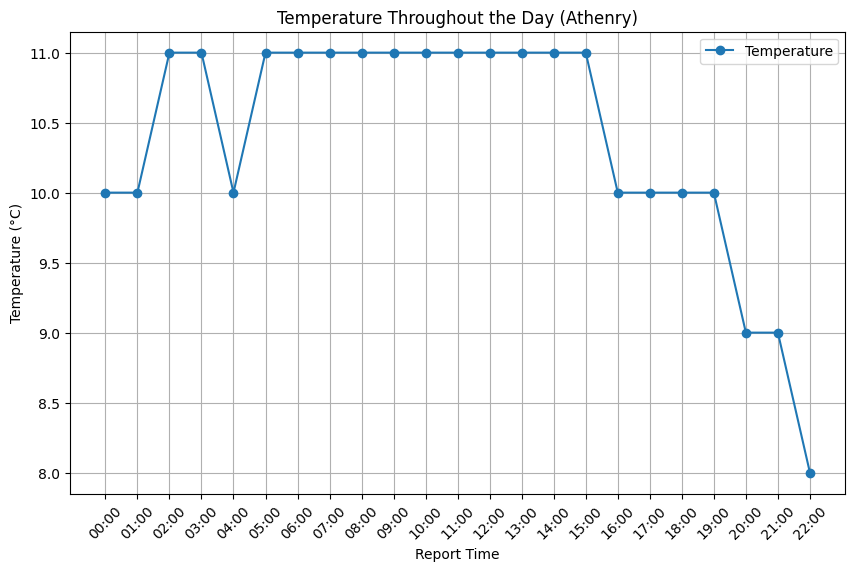

In [22]:
# Plotting temperature changes throughout the day
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(weather_data['reportTime'], weather_data['temperature'], 
         marker='o', linestyle='-', label='Temperature')  # Line plot with markers

# Adding plot details
plt.title('Temperature Throughout the Day (Athenry)')
plt.xlabel('Report Time')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()  # Add grid lines
plt.legend()  # Show legend

# Display the plot
plt.show()

# End
***